# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    city_weather = requests.get(city_url).json()

    try:
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | miandrivazo
Processing Record 2 of Set 1 | qarqaraly
Processing Record 3 of Set 1 | faya-largeau
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | weno
Processing Record 6 of Set 1 | college
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 10 of Set 1 | kapuskasing
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | richards bay
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | solnechnyy
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | soio
Processing Record 18 of Set 1 | cestos city
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,miandrivazo,-19.5167,45.4667,23.11,83,92,0.61,MG,1683325255
1,qarqaraly,49.4058,75.4742,7.86,45,6,1.48,KZ,1683325256
2,faya-largeau,17.9257,19.1043,32.09,11,0,3.74,TD,1683325256
3,thompson,55.7435,-97.8558,16.09,33,20,3.09,CA,1683325256
4,weno,7.4515,151.8468,28.97,79,100,1.54,FM,1683325256


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,miandrivazo,-19.5167,45.4667,23.11,83,92,0.61,MG,1683325255
1,qarqaraly,49.4058,75.4742,7.86,45,6,1.48,KZ,1683325256
2,faya-largeau,17.9257,19.1043,32.09,11,0,3.74,TD,1683325256
3,thompson,55.7435,-97.8558,16.09,33,20,3.09,CA,1683325256
4,weno,7.4515,151.8468,28.97,79,100,1.54,FM,1683325256


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

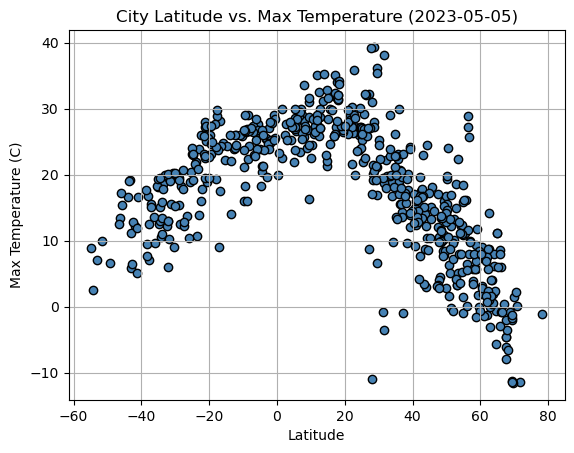

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(latitude, temperature, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (2023-05-05)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

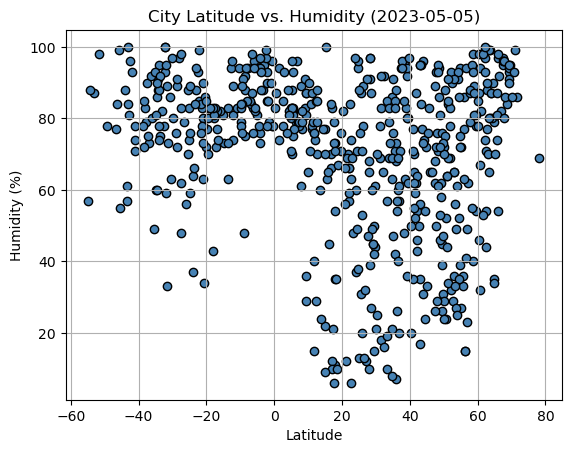

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(latitude, humidity, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Humidity (2023-05-05)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

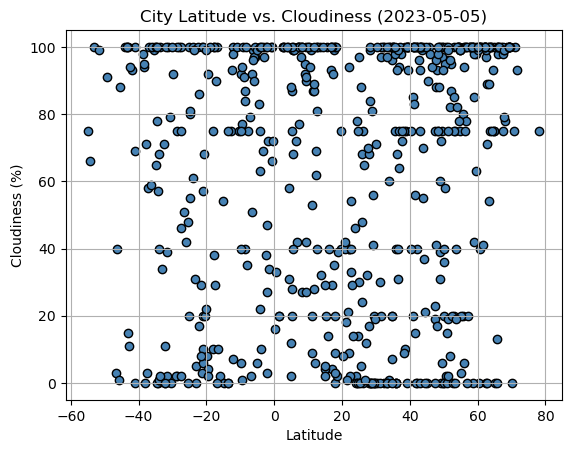

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(latitude, cloudiness, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (2023-05-05)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

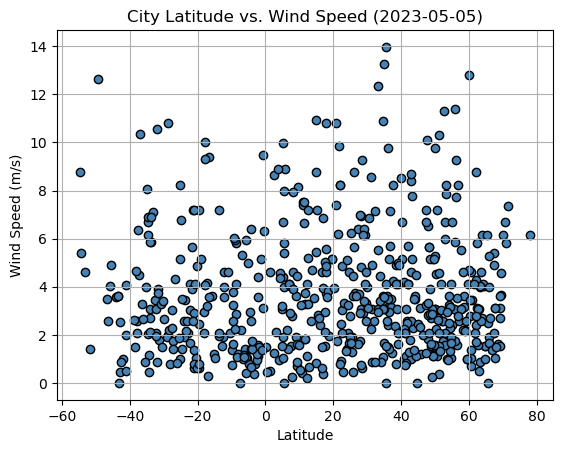

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(latitude, wind_speed, marker="o", facecolors="steelblue", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (2023-05-05)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [36]:
# Define a function to create Linear Regression plots
regression = []

def linear_regression (x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    regression.append(regress_values)
    regression.append(line_eq)
    regression.append(rvalue)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,qarqaraly,49.4058,75.4742,7.86,45,6,1.48,KZ,1683325256
2,faya-largeau,17.9257,19.1043,32.09,11,0,3.74,TD,1683325256
3,thompson,55.7435,-97.8558,16.09,33,20,3.09,CA,1683325256
4,weno,7.4515,151.8468,28.97,79,100,1.54,FM,1683325256
5,college,64.8569,-147.8028,11.18,35,75,1.54,US,1683325257


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,miandrivazo,-19.5167,45.4667,23.11,83,92,0.61,MG,1683325255
6,touros,-5.1989,-35.4608,26.46,81,6,4.99,BR,1683325257
7,puerto ayora,-0.7393,-90.3518,28.98,96,66,3.13,EC,1683325072
9,adamstown,-25.0660,-130.1015,23.13,74,100,8.23,PN,1683325258
10,richards bay,-28.7830,32.0377,19.52,89,2,2.00,ZA,1683325258


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6891264613109946


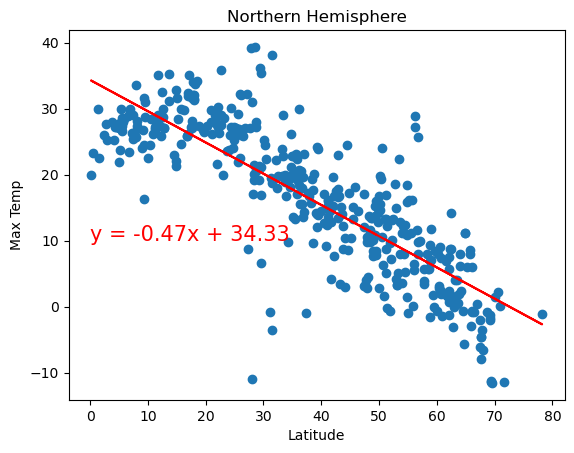

In [37]:
# Linear regression on Northern Hemisphere
latitude_n = northern_hemi_df["Lat"]
temp_n = northern_hemi_df["Max Temp"]
regression = []

linear_regression(latitude_n, temp_n)

plt.scatter(latitude_n, temp_n)
plt.plot(latitude_n, regression[0], "r-")
plt.annotate(regression[1], (0, 10), fontsize=15, color="red")
plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {(regression[2])**2}")

plt.show()

The r-value is: 0.5808484678713187


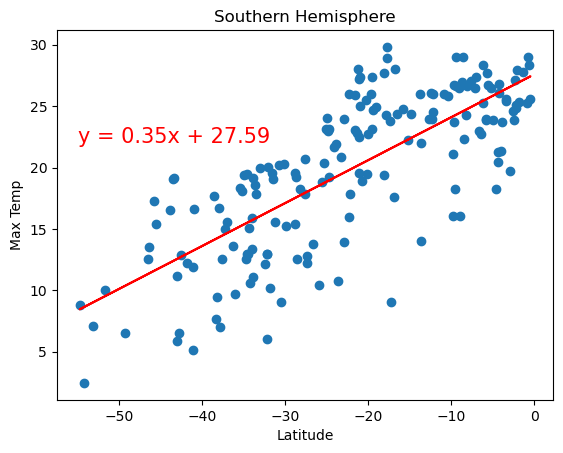

In [38]:
# Linear regression on Southern Hemisphere
latitude_s = southern_hemi_df["Lat"]
temp_s = southern_hemi_df["Max Temp"]
regression = []

linear_regression(latitude_s, temp_s)

plt.scatter(latitude_s, temp_s)
plt.plot(latitude_s, regression[0], "r-")
plt.annotate(regression[1], (-55, 22), fontsize=15, color="red")
plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {(regression[2])**2}")

plt.show()

**Discussion about the linear relationship:**
* There is a moderately positive correlation between the latitude and maximum temperature in both the Northern and the Southern Hemisphere, this is supported by a r-value of between 0.5 and 0.7 for both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.007221973116798135


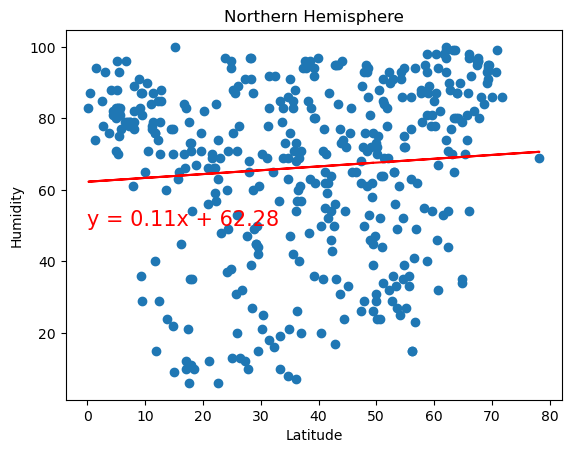

In [39]:
# Northern Hemisphere
humidity_n = northern_hemi_df["Humidity"]
regression = []

linear_regression(latitude_n, humidity_n)

plt.scatter(latitude_n, humidity_n)
plt.plot(latitude_n, regression[0], "r-")
plt.annotate(regression[1], (0, 50), fontsize=15, color="red")
plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {(regression[2])**2}")

plt.show()

The r-value is: 0.02644074968536203


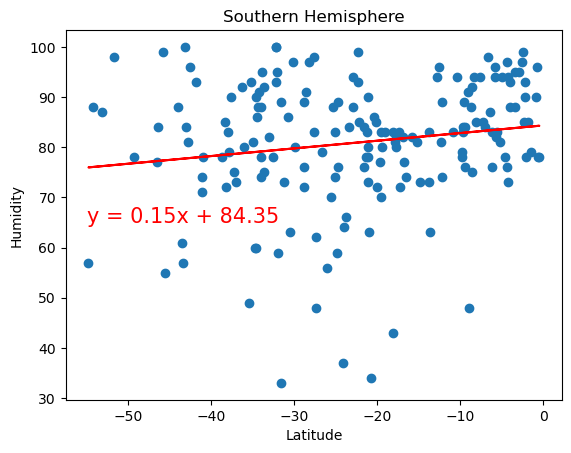

In [40]:
# Southern Hemisphere
humidity_s = southern_hemi_df["Humidity"]
regression = []

linear_regression(latitude_s, humidity_s)

plt.scatter(latitude_s, humidity_s)
plt.plot(latitude_s, regression[0], "r-")
plt.annotate(regression[1], (-55, 65), fontsize=15, color="red")
plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {(regression[2])**2}")

plt.show()

**Discussion about the linear relationship:**
* There is a negligible correlation between the latitude and humidity in both the Northern and the Southern Hemisphere, this is supported by a r-value smaller than 0.1 for both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03163081467867864


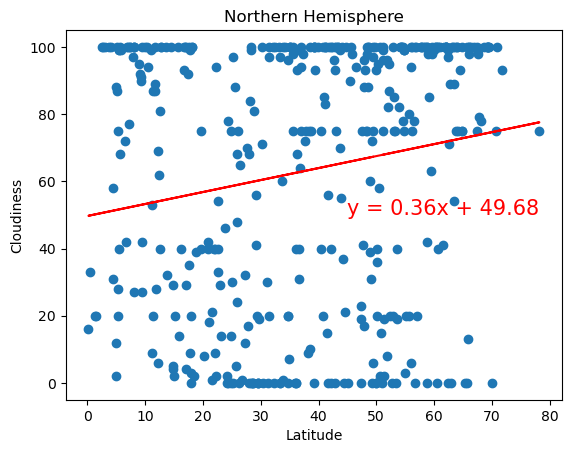

In [41]:
# Northern Hemisphere
cloudiness_n = northern_hemi_df["Cloudiness"]
regression = []

linear_regression(latitude_n, cloudiness_n)

plt.scatter(latitude_n, cloudiness_n)
plt.plot(latitude_n, regression[0], "r-")
plt.annotate(regression[1], (45, 50), fontsize=15, color="red")
plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {(regression[2])**2}")

plt.show()

The r-value is: 0.0027470566237451652


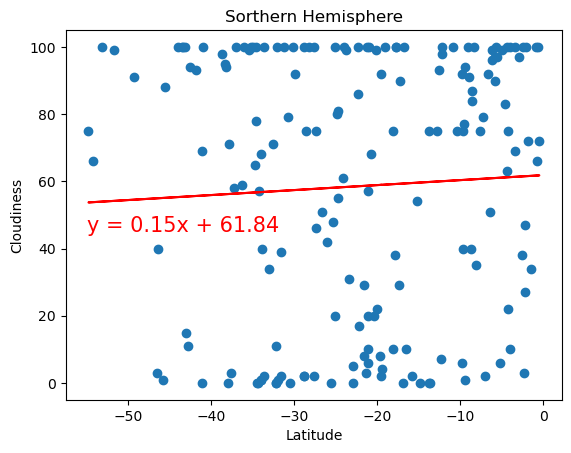

In [42]:
# Southern Hemisphere
cloudiness_s = southern_hemi_df["Cloudiness"]
regression = []

linear_regression(latitude_s, cloudiness_s)

plt.scatter(latitude_s, cloudiness_s)
plt.plot(latitude_s, regression[0], "r-")
plt.annotate(regression[1], (-55, 45), fontsize=15, color="red")
plt.title("Sorthern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {(regression[2])**2}")

plt.show()

**Discussion about the linear relationship:**
* There is a negligible correlation between the latitude and cloudiness in both the Northern and the Southern Hemisphere, this is supported by a r-value smaller than 0.1 for both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0029119860295765986


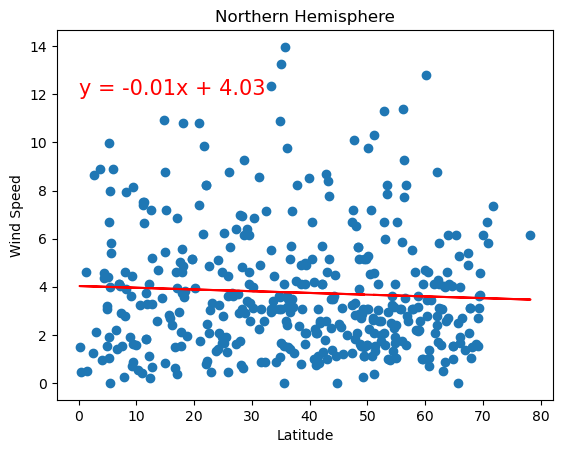

In [43]:
# Northern Hemisphere
wind_speed_n = northern_hemi_df["Wind Speed"]
regression = []

linear_regression(latitude_n, wind_speed_n)

plt.scatter(latitude_n, wind_speed_n)
plt.plot(latitude_n, regression[0], "r-")
plt.annotate(regression[1], (0, 12), fontsize=15, color="red")
plt.title("Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {(regression[2])**2}")

plt.show()

The r-value is: 0.029714290981695337


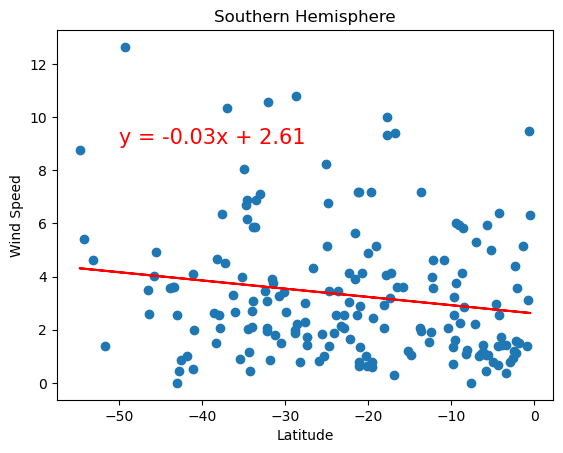

In [44]:
# Southern Hemisphere
wind_speed_s = southern_hemi_df["Wind Speed"]
regression = []

linear_regression(latitude_s, wind_speed_s)

plt.scatter(latitude_s, wind_speed_s)
plt.plot(latitude_s, regression[0], "r-")
plt.annotate(regression[1], (-50, 9), fontsize=15, color="red")
plt.title("Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {(regression[2])**2}")

plt.show()

**Discussion about the linear relationship:**
* There is a negligible correlation between the latitude and wind speed in both the Northern and the Southern Hemisphere, this is supported by a r-value smaller than 0.1 for both hemispheres.